<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/pooling_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

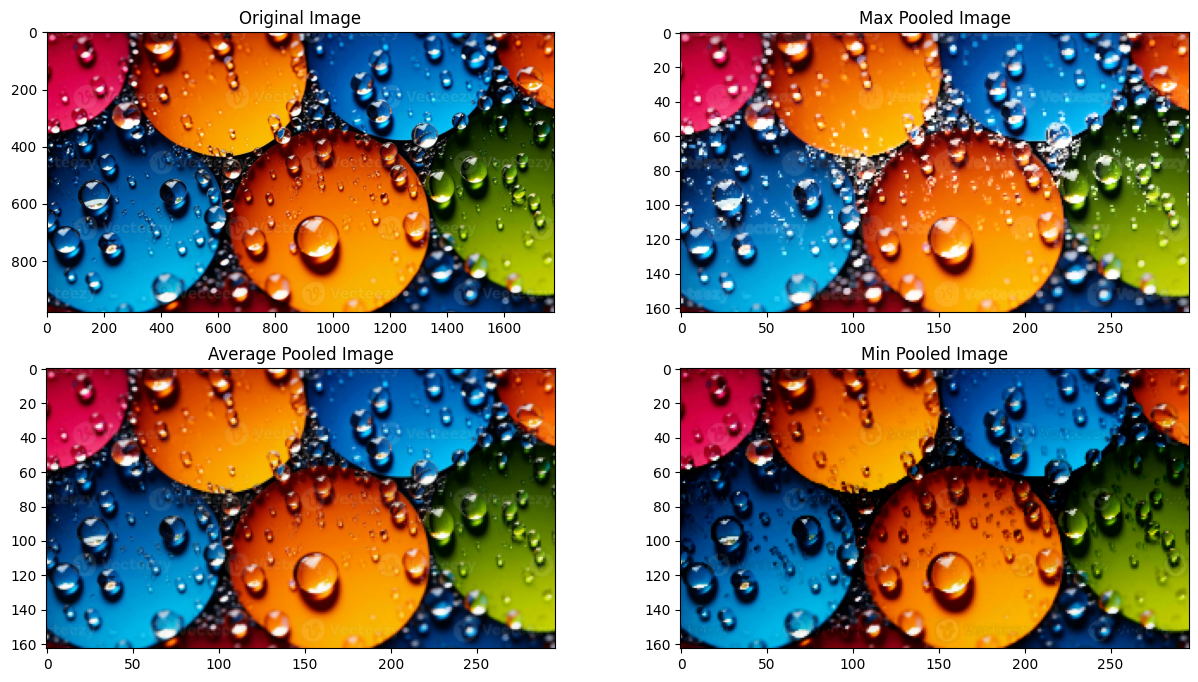

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def pool_image(image, pool_size, pool_type='max'):
    # Get the dimensions of the image
    (h, w, d) = image.shape

    # Calculate the shape of the output image
    new_h = h // pool_size[0]
    new_w = w // pool_size[1]

    # Initialize the output image
    pooled_image = np.zeros((new_h, new_w, d))

    # Perform pooling based on the selected type
    for i in range(new_h):
        for j in range(new_w):
            for k in range(d):
                region = image[i * pool_size[0]:(i + 1) * pool_size[0], j * pool_size[1]:(j + 1) * pool_size[1], k]

                if pool_type == 'max':
                    pooled_image[i, j, k] = np.max(region)
                elif pool_type == 'average':
                    pooled_image[i, j, k] = np.mean(region)
                elif pool_type == 'min':
                    pooled_image[i, j, k] = np.min(region)

    return pooled_image

# Load the image without resizing
image_url = '/content/11.jpg'  # Replace with your image URL
image = io.imread(image_url)

# Apply different pooling types
pool_size = (4, 4)  # Example pool size
max_pooled_image = pool_image(image, pool_size, pool_type='max')
avg_pooled_image = pool_image(image, pool_size, pool_type='average')
min_pooled_image = pool_image(image, pool_size, pool_type='min')

# Display the original and pooled images
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.title('Max Pooled Image')
plt.imshow(max_pooled_image.astype(np.uint8))

plt.subplot(2, 2, 3)
plt.title('Average Pooled Image')
plt.imshow(avg_pooled_image.astype(np.uint8))

plt.subplot(2, 2, 4)
plt.title('Min Pooled Image')
plt.imshow(min_pooled_image.astype(np.uint8))

plt.show()

